In [230]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [231]:
data = pd.read_csv('/content/fake_bills.csv', sep=";")
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [232]:
data = data.dropna()

In [233]:
data['is_genuine'] = data['is_genuine'].map({True: 1, False: 0})
data

<ipython-input-233-000a578c0d59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_genuine'] = data['is_genuine'].map({True: 1, False: 0})


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [234]:
X_train = data.iloc[:, 1:].values
y_train = data.iloc[:, 0].values

In [235]:
scaler = StandardScaler()

# Fit on the training data
scaler.fit(X_train)

# Transform the training data
X_train = scaler.transform(X_train)

In [236]:
# print X_train and y_train
print("X_train: \n", X_train[:5])
print("y_train: ", y_train[:5])


X_train: 
 [[-0.48859357  2.76680735  3.17376615  0.05128623 -1.13698239  0.17784229]
 [-1.63480853 -2.24148961 -0.80685073 -1.07893701 -0.7048056   0.47569209]
 [ 2.39331832  1.49803879 -1.30057066 -0.12954949 -0.92089399  0.55588243]
 [-1.96229852 -0.40511406  0.05715913 -1.30498166 -0.61837024  0.95683409]
 [-0.75058556  0.83026586 -1.42400064 -0.67205664  1.41286065 -0.15437481]]
y_train:  [1 1 1 1 1]


In [237]:
print ('The shape of X_train: ' + str(X_train.shape))
print ('The shape of y_train: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train: (1463, 6)
The shape of y_train: (1463,)
We have m = 1463 training examples


In [238]:
print("Original shape of data:", X_train.shape)

Original shape of data: (1463, 6)


In [239]:
print("X_train[0]: ", X_train[0])

X_train[0]:  [-0.48859357  2.76680735  3.17376615  0.05128623 -1.13698239  0.17784229]


In [240]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1 / (1+np.exp(-z))


    return g

In [241]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost
    """

    m, n = X.shape

    total_cost = 0

    for i in range(m):
        f_wb_x = sigmoid(np.dot(w, X[i]) + b)

        part1 = y[i]*np.log(f_wb_x)
        part2 = (1-y[i])*np.log(1-f_wb_x)

        total_cost += part1 + part2


    total_cost = -total_cost / m



    return total_cost

In [242]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost
    """

    m, n = X.shape

    # Calls the compute_cost function
    cost_without_reg = compute_cost(X, y, w, b)

    # Regularization cost
    reg_cost = 0.

    for j in range(n):
        reg_cost += w[j] * w[j]

    reg_cost = (lambda_/(2*m)) * reg_cost


    # Total Cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [243]:
np.random.seed(1)
initial_w = np.zeros(6)
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_train, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)


Regularized cost : 0.6422246260119541


In [244]:
def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += w[j] * X[i][j]
        z_wb += b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i][j]

    dj_dw = dj_dw / m
    dj_db = dj_db / m


    return dj_db, dj_dw

In [245]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the gradient for logistic regression with regularization

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.

    """
    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]

    return dj_db, dj_dw

In [246]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print("Iteration {:4}: Cost {:8.2f}   ".format(i, float(J_history[-1])))

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [247]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.zeros(X_train.shape[1])
initial_b = 0

# Set regularization parameter lambda
lambda_ = 0.03

# Gradient descent settings
iterations = 1000
alpha = 0.3

w,b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.56   
Iteration  100: Cost     0.06   
Iteration  200: Cost     0.04   
Iteration  300: Cost     0.04   
Iteration  400: Cost     0.04   
Iteration  500: Cost     0.03   
Iteration  600: Cost     0.03   
Iteration  700: Cost     0.03   
Iteration  800: Cost     0.03   
Iteration  900: Cost     0.03   
Iteration  999: Cost     0.03   


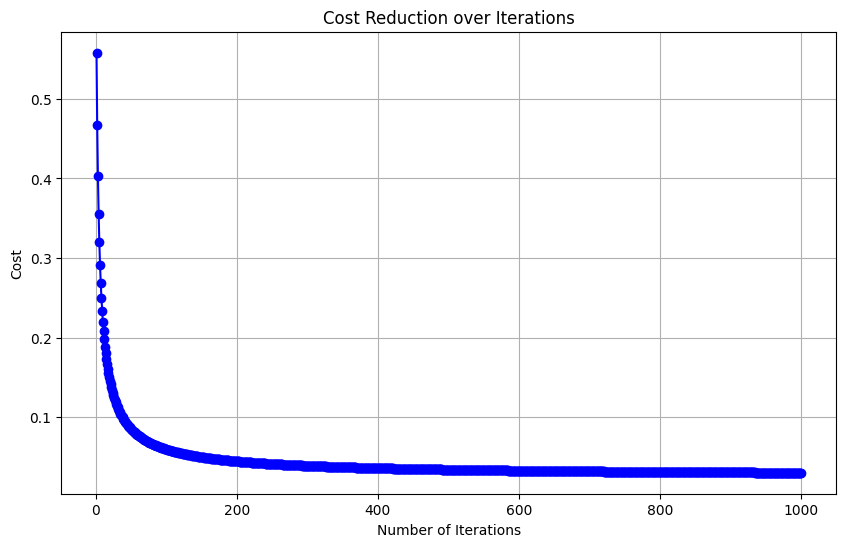

In [248]:
# Number of iterations
iterations = range(1, len(J_history) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, J_history, marker='o', linestyle='-', color='b')
plt.title('Cost Reduction over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


In [249]:
def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += w[j] * X[i][j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 0 if f_wb < 0.5 else 1

    return p

In [250]:
#Compute accuracy on the training set
p = predict(X_train, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 99.248120
